In [1]:
#from pandas import read_csv
import pandas as pd
from IPython.display import Image

In [2]:
from src.funcs_importar import gdb

gdb()

'/home/ggrl/geodatabase/'

# Neste notebook vamos utilizar as funçoes read_csv() e dropna() da biblioteca Pandas.

## Com um visualizador de logs podemos abrir os arquivos GamaLine.XYZ e GamaTie.XYZ:
    - git clone https://aur.archlinux.org/klogg-bin.git
    - cd klogg
    - makepkg
    - install tar.gz
    
    - Klogg is a substitute to Glogg. A fast log viewer and is used here to identify:
        - os nomes de cada coluna do arquivo e;
        - o numero de linhas de cabeçalho.

# Levantamento 1105

## Dados Gamaespectrometricos

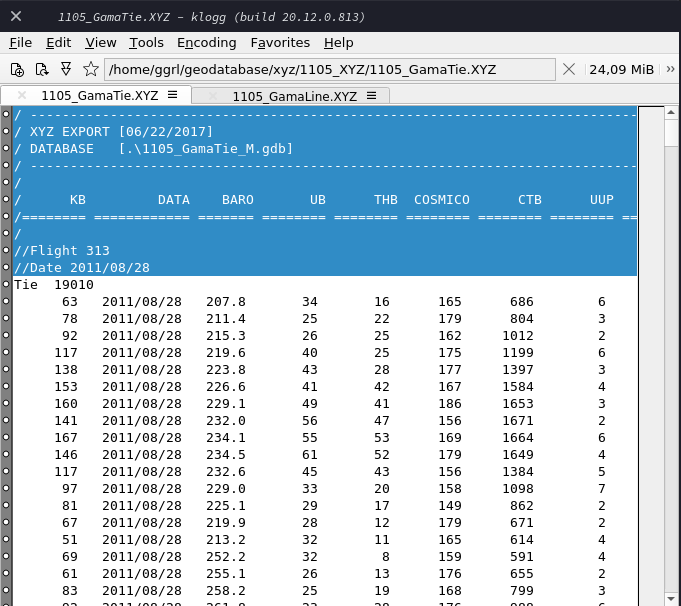

In [4]:
Image('imagens/klogg_gline_1105.png')

### Importando dados brutos

In [6]:
gdb('xyz/1105_XYZ/1105/XYZ/1105_GamaLine.XYZ')

'/home/ggrl/geodatabase/xyz/1105_XYZ/1105/XYZ/1105_GamaLine.XYZ'

In [31]:
gama_line_1105_cols = 'KB DATA BARO UB THB COSMICO CTB UUP ALTURA KPERC eU eTH CTEXP UTHRAZAO X Y UKRAZAO MDT THKRAZAO LIVE_TIME CTCOR KCOR THCOR UCOR HORA GPSALT LATITUDE FIDUCIAL TEMP LONGITUDE'.split(" ")             


gama_line_1105 = pd.read_csv(gdb('xyz/1105_XYZ/1105/XYZ/1105_GamaLine.XYZ'),
                         names=gama_line_1105_cols,
                         delim_whitespace=True,
                         skiprows=10,                                     # Linhas de cabeçalho
                         usecols=["X","Y","LATITUDE","LONGITUDE",
                                  "KPERC","eU","eTH","CTCOR",
                                  "THKRAZAO","UTHRAZAO","UKRAZAO","MDT"])
                                  

In [32]:
gama_tie_1105_cols  = 'KB DATA BARO UB THB COSMICO CTB UUP ALTURA KPERC eU eTH CTEXP UTHRAZAO X Y UKRAZAO MDT THKRAZAO LIVE_TIME CTCOR KCOR THCOR UCOR HORA GPSALT LATITUDE FIDUCIAL TEMP LONGITUDE __X __Y'.split(" ")

gama_tie_1105 = pd.read_csv(gdb('xyz/1105_XYZ/1105/XYZ/1105_GamaTie.XYZ'),
                         names=gama_tie_1105_cols,
                         delim_whitespace=True,
                         skiprows=10,
                         usecols=["X","Y","LATITUDE","LONGITUDE",
                                  "KPERC","eU","eTH","CTCOR",
                                  "THKRAZAO","UTHRAZAO","UKRAZAO","MDT"])

In [33]:
# A primeira linha possui valores não numéricos 'NaN' que devem ser removidos
gama_line_1105.head(5)

,KPERC,eU,eTH,UTHRAZAO,X,Y,UKRAZAO,MDT,THKRAZAO,CTCOR,LATITUDE,LONGITUDE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.02,1.11,13.00,0.1,292878.15,7624109.00,0.9,600.12,9.86,23.0,-21.473638,-46.998997
2,1.47,1.09,13.53,0.1,292876.59,7624190.38,0.8,599.47,9.77,24.2,-21.472903,-46.999002
3,1.82,1.15,14.97,0.1,292875.03,7624271.94,0.8,600.63,9.81,25.3,-21.472167,-46.999007
4,1.52,1.22,14.94,0.1,292874.16,7624353.33,0.7,602.72,9.96,25.5,-21.471432,-46.999005


### Observando os logs foi possível identifcar que entre as linhas dos dados numéricos existem índices de Lines e Tie que indicam à qual linha de voo os pontos pertencem e estas linhas serão ignoradas por enquanto.
    - Com a função 'df.shape' observamos o formato do nosso dado,
    - após a execução da função df.dropna(inplace=True) observamos que aqueles indices foram removidos 

In [34]:
print(f'Rows Gama_Tie: {gama_tie_1105.shape[0]}\
     Columns Gama_Tie: {gama_tie_1105.shape[1]}')

Rows Gama_Tie: 73153     Columns Gama_Tie: 12


In [35]:
print(f'Rows Gama_Line: {gama_line_1105.shape[0]}\
     Columns Gama_Line: {gama_line_1105.shape[1]}')

Rows Gama_Line: 1173985     Columns Gama_Line: 12


### Removendo valores não numéricos

In [36]:
gama_line_1105.dropna(inplace=True) 
gama_tie_1105.dropna(inplace=True)

In [37]:
print(f'Rows Gama_Tie: {gama_tie_1105.shape[0]}\
     Columns Gama_Tie: {gama_tie_1105.shape[1]}')

print(f'Rows Gama_Line: {gama_line_1105.shape[0]}\
     Columns Gama_Line: {gama_line_1105.shape[1]}')

Rows Gama_Tie: 72995     Columns Gama_Tie: 12
Rows Gama_Line: 1169659     Columns Gama_Line: 12


### Exportando os arquivos tratados para um CSV

In [38]:
gama_tie_1105.to_csv(gdb('geof/gama_tie_1105'),index=False)
gama_line_1105.to_csv(gdb('geof/gama_line_1105'),index=False)

## Dados Magnetometricos

### Colunas descritas nos dados brutos

In [39]:
# Line
# /        DATA BARO ALTURA X Y MDT HORA   GPSALT    LATITUDE   FIDUCIAL   LONGITUDE     ALTURA_1       IGRF    MAGBASE     MAGBRU     MAGCOM     MAGCOR    MAGIGRF     MAGMIC     MAGNIV
# Tie
# / DATA BARO ALTURA,X,Y,MDT,HORA GPSALT    LATITUDE   FIDUCIAL   LONGITUDE     ALTURA_1       IGRF    MAGBASE     MAGBRU     MAGCOM     MAGCOR    MAGIGRF     MAGMIC     MAGNIV 

mag_1105_cols = 'DATA BARO ALTURA X Y MDT HORA GPSALT LATITUDE FIDUCIAL LONGITUDE ALTURA_1 IGRF MAGBASE MAGBRU MAGCOM MAGCOR MAGIGRF MAGMIC MAGNIV'.split(" ")

### Importando dados brutos

In [42]:
mag_line_1105 = pd.read_csv(gdb('xyz/1105_XYZ/1105/XYZ/1105_MagLine.XYZ'),
                         names=mag_1105_cols,
                         delim_whitespace=True,
                         skiprows=11,                                     # Linhas de cabeçalho
                         usecols=["X","Y","LATITUDE","LONGITUDE",
                                  "MAGIGRF","ALTURA","ALTURA_1","MDT"])

mag_tie_1105 = pd.read_csv(gdb('xyz/1105_XYZ/1105/XYZ/1105_MagTie.XYZ'),
                         names=mag_1105_cols,
                         delim_whitespace=True,
                         skiprows=11,
                         usecols=["X","Y","LATITUDE","LONGITUDE",
                                  "MAGIGRF","ALTURA","ALTURA_1","MDT"])

mag_1105 = pd.concat([mag_line_1105,mag_tie_1105], ignore_index=True)

### Removendo valores nao numericos

In [43]:
# numero de linhas e colunas;
print(mag_1105.shape)
print(mag_1105.isna().sum()) # soma dos valores nao numericos para cada coluna;

(12344761, 8)
ALTURA       4103
X            4103
Y            4103
MDT          4103
LATITUDE     4103
LONGITUDE    4103
ALTURA_1     4103
MAGIGRF      4103
dtype: int64


In [44]:
mag_1105.dropna(inplace=True)

In [45]:
print(mag_1105.isna().sum()) # soma dos valores nao numericos para cada coluna;

ALTURA       0
X            0
Y            0
MDT          0
LATITUDE     0
LONGITUDE    0
ALTURA_1     0
MAGIGRF      0
dtype: int64


### Exportando os arquivos tratados para um CSV

In [46]:
mag_line_1105.to_csv(gdb('geof/mag_line_1105'), index=False)
mag_tie_1105.to_csv(gdb('geof/mag_tie_1105'), index=False)
mag_1105.to_csv(gdb('geof/mag_1105'), index=False)

# Levantamento 3022 

In [26]:
gama_3022_cols = 'ALTURA BARO COSMICO CTB CTCOR CTEXP DATA eTh eU FIDUCIAL GPSALT HORA KB KCOR KPERC LATITUDE LIVE_TIME LONGITUDE MDT TEMP THB THCOR THKRAZAO UB UCOR UKRAZAO UTHRAZAO UUP X X_WGS Y Y_WGS'.split(" ")

gama_3022 = pd.read_csv(gdb('xyz/3022_XYZ/XYZ/Area_14_gama.XYZ'),
                         names=gama_3022_cols,
                         delim_whitespace=True,
                         skiprows=8,
                         usecols=['X',"Y","LATITUDE","LONGITUDE",
                                  "KPERC", 'eU', 'eTh', 'CTCOR',
                                  'UTHRAZAO', "THKRAZAO", "UKRAZAO",
                                  "MDT"],
                         encoding='latin-1'
                         )

### Importando dados brutos
 - Este arquivo:
    - XYZ obtiddo atravéz do Professor Vinicius Abud Louro;
    - provém de um projeto diferente dos disponibilizados no portal SGB;
    - não possui os mesmo padrões que os arquivos disponibilizados no portal SGB;
    - possui valores expúrios entre os valores gama e mag;
        - valor identificado como '*' atravéz dos seguintes passos:
            - 
 

In [28]:
mag_3022_cols = 'ALTURA BARO DATA FID GPSALT HORA IGRF LAT_WGS LONG_WGS MAGBASE MAGBRU MAGCOM MAGCOR MAGIGRF MAGMIC MAGNIV MDT X X_WGS Y Y_WGS'.split(" ")


mag_3022 = pd.read_csv(gdb('xyz/3022_XYZ/XYZ/Area_14_mag.XYZ'),
                         names=mag_3022_cols,
                         delim_whitespace=True,
                         skiprows=8,
                         usecols=["X","Y","LAT_WGS","LONG_WGS",
                                  "ALTURA",
                                  "MAGIGRF","MDT"],
                         na_values=('*'),                     
                         dtype=('float'),
                         encoding='latin-1'
                         )

### Removendo valores nao numericos

In [29]:
gama_3022.dropna(inplace=True) 
mag_3022.dropna(inplace=True)

### Salvando o dado tratado em um .CSV

In [30]:
gama_3022.to_csv(gdb('geof/gama_3022'),index=False)
mag_3022.to_csv(gdb('geof/mag_3022'),index=False)

# Levantamento 1039

In [3]:
'/  UTME      UTMN       LONG         LAT       MAGR      THC       UC        KC        CTC       MAGB      MAGC      MAGD      THB       UB        KB        CTB       FIDU      TEMP      ALTE      ALTB'

cols_1039 = 'UTME UTMN LONG LAT MAGR THC UC KC CTC MAGB MAGC MAGD THB UB KB CTB FIDU TEMP ALTE ALTB'.split(" ")

usecols=["UTME","UTMN","LAT","LONG","KC","UC","THC","CTC","MAGR","ALTE"]            
      
geof_1039 = pd.read_csv(gdb('xyz/1039_XYZ/spaulo_rjaneiro_sp.xyz'),
                         names=cols_1039,
                         delim_whitespace=True,
                         usecols=usecols,
                         skiprows=6,
                         encoding='latin-1') # foi adicionado um novo tipo de econding diferente de UTF-8

In [4]:
geof_1039.head(10)

,UTME,UTMN,LONG,LAT,MAGR,THC,UC,KC,CTC,ALTE
0,684002.,7335281.0,-49.190033,-24.083740,-144.49,45.56,5.05,14.96,714.25,148.44
1,684003.,7335381.0,-49.190048,-24.082840,-147.53,53.58,0.00,27.56,708.61,148.74
2,684004.,7335481.0,-49.190048,-24.081940,-144.57,52.58,14.07,15.95,837.01,145.69
3,684005.,7335581.0,-49.190048,-24.081039,-146.61,51.68,0.00,46.94,862.91,139.90
4,684006.,7335681.0,-49.190048,-24.080124,-156.65,62.20,21.64,12.20,898.35,133.20
5,684008.,7335781.0,-49.190048,-24.079224,-160.69,52.66,17.19,33.70,881.14,126.19
6,684009.,7335881.0,-49.190048,-24.078323,-163.73,56.12,22.15,25.01,931.36,121.31
7,684010.,7335981.0,-49.190048,-24.077423,-171.77,77.71,14.58,17.94,949.37,119.18
8,684011.,7336081.0,-49.190048,-24.076523,-158.82,64.62,9.26,37.98,897.67,121.62
9,684012.,7336181.0,-49.190048,-24.075623,-131.86,44.36,23.19,36.32,882.40,127.41


In [5]:
geof_1039.isnull().sum()

UTME      0
UTMN      0
LONG    853
LAT     853
MAGR    853
THC     853
UC      853
KC      853
CTC     853
ALTE    853
dtype: int64

In [6]:
geof_1039.dropna(inplace=True)

In [7]:
geof_1039.rename(columns=\
                {'UTMN':'Y',
                 'UTME':'X',
                 'LONG':'LONGITUDE',
                 'LAT':'LATITUDE'},inplace=True)

In [8]:
geof_1039

,X,Y,LONGITUDE,LATITUDE,MAGR,THC,UC,KC,CTC,ALTE
0,684002.,7335281.0,-49.190033,-24.083740,-144.49,45.56,5.05,14.96,714.25,148.44
1,684003.,7335381.0,-49.190048,-24.082840,-147.53,53.58,0.00,27.56,708.61,148.74
2,684004.,7335481.0,-49.190048,-24.081940,-144.57,52.58,14.07,15.95,837.01,145.69
3,684005.,7335581.0,-49.190048,-24.081039,-146.61,51.68,0.00,46.94,862.91,139.90
4,684006.,7335681.0,-49.190048,-24.080124,-156.65,62.20,21.64,12.20,898.35,133.20
...,...,...,...,...,...,...,...,...,...,...
539897,329329.,7563776.0,-46.653473,-22.022064,92.53,70.13,20.86,245.36,2177.98,118.87
539898,329426.,7563774.0,-46.652527,-22.022095,100.51,54.54,19.79,279.66,2144.92,107.29
539899,329523.,7563771.0,-46.651596,-22.022125,100.50,74.22,19.75,236.94,2081.99,96.93
539900,329620.,7563769.0,-46.650650,-22.022156,96.48,68.61,5.81,235.28,1978.74,89.00


In [25]:
geof_1039.to_csv(gdb('geof/geof_1039'),index=False)

# Levantamento 1089

### Colunas descritas nos dados brutos

In [ ]:
gama_1089_cols = 'X Y FIDUCIAL GPSALT BARO ALTURA MDT CTB KB UB THB UPU LIVE_TIME COS TEMP KPERC eU eth CTEXP CTCOR UCOR THCOR KCOR THKRAZAO UKRAZAO UTHRAZAO LONGITUDE LATITUDE DATA HORA'.split(" ")

mag_1089_cols = 'X Y FIDUCIAL GPSALT BARO ALTURA MDT MAGBASE MAGBRU MAGCOM MAGCOR MAGNIV MAGMIC MAGIGRF IGRF LONGITUDE LATITUDE DATA HORA'.split(" ")

In [ ]:
gama_line_1089 = pd.read_csv(gdb('xyz/1089_XYZ/XYZ/1089_GamaLine.XYZ'),
                         names=gama_1089_cols,
                         delim_whitespace=True,
                         skiprows=11,
                         usecols=["X","Y","LATITUDE","LONGITUDE",
                                  "KPERC","eU","eth","CTCOR",
                                  "THKRAZAO","UKRAZAO","UTHRAZAO",
                                  "MDT"],
                         na_values=('*'))

gama_tie_1089 = pd.read_csv(gdb('xyz/1089_XYZ/XYZ/1089_GamaTie.XYZ'),
                         names=gama_1089_cols,
                         delim_whitespace=True,
                         skiprows=11,
                         usecols=["X","Y","LATITUDE","LONGITUDE",
                                  "KPERC","eU","eth","CTCOR",
                                  "THKRAZAO","UKRAZAO","UTHRAZAO",
                                  "MDT"],
                         na_values=('*'))

gama_1089 = pd.concat([gama_tie_1089,gama_line_1089], ignore_index=True)

In [ ]:
gama_1089.dropna(inplace=True)

In [ ]:
gama_1089

In [ ]:
gama_line_1089.dropna(inplace=True)
gama_line_1089

In [ ]:
from src.funcs_descricao import descricao
descricao(gama_line_1089)

In [ ]:
gama_1089.head()

In [ ]:
#gama_1089.to_csv(gdb+'geof/gama_1089',index=False)
gama_line_1089.to_csv(gdb+'geof/gama_line_1089',index=False)

In [ ]:
mLine_1089 = pd.read_csv(gdb+'xyz/1089_XYZ/XYZ/1089_MagLine.XYZ',
                         names=mag_cols,
                         delim_whitespace=True,
                         skiprows=11,
                         usecols=["X","Y","LATITUDE","LONGITUDE",
                                  "MAGIGRF","ALTURA","MDT"],
                         na_values=('*'))

In [ ]:
mTie_1089 = pd.read_csv(gdb+'xyz/1089_XYZ/XYZ/1089_MagTie.XYZ',
                         names=mag_cols,
                         delim_whitespace=True,
                         skiprows=11,
                         usecols=["X","Y","LATITUDE","LONGITUDE",
                                  "MAGIGRF","ALTURA","MDT"],
                         na_values=('*'))

In [ ]:
m_1089 = pd.concat([mTie_1089,mLine_1089], ignore_index=True)

In [ ]:
mag_1089 = m_1089.dropna()

In [ ]:
mag_1089.to_csv(gdb+'geof/mag_1089',index=False)

In [ ]:
a = f.descricao(mag_1089)

In [ ]:
a[0]

In [ ]:
a[4].T

# Podemos criar uma classe que padroniza a função pandas.read_csv() para que o processo possa ser executado de forma mais eficiente


In [ ]:
class Import:
    '''

    '''
    # Params -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    def __init__(self,caminho,usecols):
        self.caminho = caminho
        self.usecols = usecols
    # --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    
    # Gama ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    def gama(self):
        '''

        '''
        gama_tie_1105_cols  = 'KB DATA BARO UB THB COSMICO CTB UUP ALTURA KPERC eU eTH CTEXP UTHRAZAO X Y UKRAZAO MDT THKRAZAO LIVE_TIME CTCOR KCOR THCOR UCOR HORA GPSALT LATITUDE FIDUCIAL TEMP LONGITUDE __X __Y'.split(" ")
        gama_line_1105_cols = 'KB DATA BARO UB THB COSMICO CTB UUP ALTURA KPERC eU eTH CTEXP UTHRAZAO X Y UKRAZAO MDT THKRAZAO LIVE_TIME CTCOR KCOR THCOR UCOR HORA GPSALT LATITUDE FIDUCIAL TEMP LONGITUDE'.split(" ")             
        gama_1089_cols = 'X Y FIDUCIAL GPSALT BARO ALTURA MDT CTB KB UB THB UPU LIVE_TIME COS TEMP KPERC eU eth CTEXP CTCOR UCOR THCOR KCOR THKRAZAO UKRAZAO UTHRAZAO LONGITUDE LATITUDE DATA HORA'.split(" ")
        mag_1089_cols = 'X Y FIDUCIAL GPSALT BARO ALTURA MDT MAGBASE MAGBRU MAGCOM MAGCOR MAGNIV MAGMIC MAGIGRF IGRF LONGITUDE LATITUDE DATA HORA'.split(" ")
        
        df = pd.read_csv(gdb(self.caminho),
                            names = 'KB DATA BARO UB THB COSMICO CTB UUP ALTURA KPERC eU eTH CTEXP UTHRAZAO X Y UKRAZAO MDT THKRAZAO LIVE_TIME CTCOR KCOR THCOR UCOR HORA GPSALT LATITUDE FIDUCIAL TEMP LONGITUDE'.split(" "),
                            usecols = self.usecols,
                            delim_whitespace=True,
                            skiprows=10)
                                
        return df
    # --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    
    # Mag ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    def mag(self):
        '''
        
        '''

        df = pd.read_csv(gdb(self.caminho),
                        names = self.mag_1105_cols,
                        usecols = self.usecols,
                        delim_whitespace=True,
                        skiprows=10)

        return df


    def litologia(self):
        '''
        
        '''

        return litologia

    def malha_cartog(self):
        '''
        
        '''
        
        litologia = gpd.read_file(gdb('geodatabase.gpkg'),
                        )


        return malha_cartog
    # --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
Import_xyz('geof/1105_GamaLine.XYZ',['X','Y','CTCOR']).gama()

In [ ]:
Import_xyz('geof/1105_GamaLine.XYZ',['X','Y','LATITUDE','LONGITUDE','KPERC','eU','eTH','CTCOR','MDT']).gama()


In [ ]:
Import_xyz('geof/1089_GamaLine.XYZ',['X','Y','LATITUDE','LONGITUDE','KPERC','eU','eTH','CTCOR','MDT']).gama()


In [ ]:
Import_xyz('geof/MagLine')

In [ ]:
# ['ALTURA','ALTURA_1','X', 'Y', 'MDT','MAGIGRF']